In [5]:
import cv2
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("naman.jpeg")

img.shape

(1099, 900, 3)

In [3]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray_img.shape

(1099, 900)

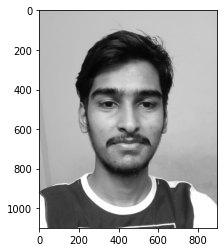

In [8]:
plt.imshow(gray_img, cmap="gray")

In [9]:
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

In [10]:
faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)

faces[0]

array([182, 253, 539, 539])

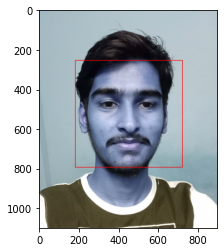

In [11]:
x, y, w, h = faces[0]

face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(face_img)

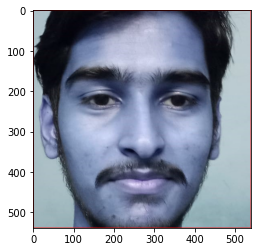

In [13]:
face = face_img[y:y+h, x:x+w]

plt.imshow(face, cmap="gray")

In [14]:
import pywt
import numpy as np

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

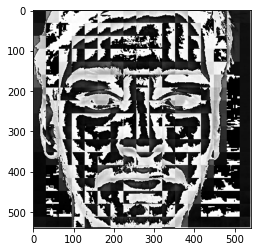

In [17]:
img_har = w2d(face, "haar", 5)

plt.imshow(img_har, cmap="gray")